In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import pydot
import datetime

In [2]:
#Importing the Raw Data
Weather_Data_Raw = pd.read_csv("Raw Weather Data.csv")

print(Weather_Data_Raw.head())

       STATION                           NAME        DATE   AWND  PRCP  SNOW  \
0  USW00003892  AUBURN OPELIKA AIRPORT, AL US  2020-01-01   3.80  0.00   0.0   
1  USW00003892  AUBURN OPELIKA AIRPORT, AL US  2020-01-02   6.93  0.40   0.0   
2  USW00003892  AUBURN OPELIKA AIRPORT, AL US  2020-01-03   6.71  1.50   0.0   
3  USW00003892  AUBURN OPELIKA AIRPORT, AL US  2020-01-04  11.86  0.02   0.0   
4  USW00003892  AUBURN OPELIKA AIRPORT, AL US  2020-01-05   5.82  0.00   0.0   

   SNWD  TMAX  TMIN   WDF2   WDF5  WSF2  WSF5  WT01  WT02  WT03  WT08  
0   0.0  57.0  34.0  220.0    NaN   6.9   NaN   NaN   NaN   NaN   NaN  
1   0.0  65.0  46.0  170.0  140.0  12.1  21.0   1.0   NaN   NaN   NaN  
2   0.0  68.0  58.0  160.0    NaN  14.1   NaN   1.0   NaN   NaN   NaN  
3   0.0  58.0  35.0  310.0  290.0  21.0  33.1   NaN   NaN   NaN   NaN  
4   0.0  56.0  29.0  340.0    NaN   8.9   NaN   NaN   NaN   NaN   NaN  


In [3]:
#Taking off redundant (Station, Name), unecessary rows(Snow, SNWD), and Majorly incomplete rows (WT01 - WT08)
Weather_Data_Cull = Weather_Data_Raw
Weather_Data_Cull = Weather_Data_Cull.drop(['STATION', 'NAME', 'SNOW', 'SNWD', 'WT01', 'WT02', 'WT02',
                                            'WT03', 'WT08', "WSF5", "WDF5", 'PRCP' ], axis=1)

print(Weather_Data_Cull.head())

         DATE   AWND  TMAX  TMIN   WDF2  WSF2
0  2020-01-01   3.80  57.0  34.0  220.0   6.9
1  2020-01-02   6.93  65.0  46.0  170.0  12.1
2  2020-01-03   6.71  68.0  58.0  160.0  14.1
3  2020-01-04  11.86  58.0  35.0  310.0  21.0
4  2020-01-05   5.82  56.0  29.0  340.0   8.9


In [4]:
#shows us that our df contians null/ useless values
print(Weather_Data_Cull.sort_values(by = ['TMAX'], ascending= False))


            DATE  AWND  TMAX  TMIN   WDF2  WSF2
884   2022-06-24  6.93  96.0  75.0  350.0  10.1
882   2022-06-13  3.58  95.0  75.0  260.0   8.1
565   2021-07-29  4.03  95.0  74.0  330.0   8.9
200   2020-07-19  3.13  95.0  75.0  160.0   6.9
898   2022-07-08  6.04  94.0  75.0  310.0  14.1
...          ...   ...   ...   ...    ...   ...
1194  2023-07-08   NaN   NaN   NaN    NaN   NaN
1195  2023-07-09   NaN   NaN   NaN    NaN   NaN
1196  2023-07-10   NaN   NaN   NaN    NaN   NaN
1197  2023-07-11   NaN   NaN   NaN    NaN   NaN
1198  2023-07-13   NaN   NaN   NaN    NaN   NaN

[1199 rows x 6 columns]


In [5]:
#Adding in the below line of code will be the final step to trimming the Data
Weather_Data_Cull.set_index('DATE')
Weather_Data_Cull = Weather_Data_Cull.dropna()
print(Weather_Data_Cull.sort_values(by = ['TMAX'], ascending= False))

           DATE  AWND  TMAX  TMIN   WDF2  WSF2
884  2022-06-24  6.93  96.0  75.0  350.0  10.1
200  2020-07-19  3.13  95.0  75.0  160.0   6.9
565  2021-07-29  4.03  95.0  74.0  330.0   8.9
882  2022-06-13  3.58  95.0  75.0  260.0   8.1
201  2020-07-20  3.13  94.0  72.0  180.0   8.1
..          ...   ...   ...   ...    ...   ...
373  2021-01-08  8.50  42.0  36.0  320.0  15.0
351  2020-12-17  8.50  41.0  29.0  330.0  13.0
736  2022-01-17  8.05  39.0  28.0  300.0  14.1
359  2020-12-25  8.72  38.0  25.0  280.0  17.0
374  2021-01-09  9.62  37.0  33.0  330.0  14.1

[1152 rows x 6 columns]


In [6]:
#This block will extract the data from the Date column and create three seperate columns that are labekld 'YEAR', 'MONTH', and 'DAY'


#Creates the three new columns
Weather_Data_Cull["YEAR"] = np.nan
Weather_Data_Cull["MONTH"] = np.nan
Weather_Data_Cull["DAY"] = np.nan

print(Weather_Data_Cull.head())

         DATE   AWND  TMAX  TMIN   WDF2  WSF2  YEAR  MONTH  DAY
0  2020-01-01   3.80  57.0  34.0  220.0   6.9   NaN    NaN  NaN
1  2020-01-02   6.93  65.0  46.0  170.0  12.1   NaN    NaN  NaN
2  2020-01-03   6.71  68.0  58.0  160.0  14.1   NaN    NaN  NaN
3  2020-01-04  11.86  58.0  35.0  310.0  21.0   NaN    NaN  NaN
4  2020-01-05   5.82  56.0  29.0  340.0   8.9   NaN    NaN  NaN


In [7]:
Length = len(Weather_Data_Cull.index)-2
print(Length)
count = 0
for index, row in Weather_Data_Cull.iterrows():
    count = count + 1
    try:
   #Creates a DateString for each row
        DateString = Weather_Data_Cull.iloc[index]['DATE']
    
    #Extracts the three pieces of info we need from the datestring and begins dividing that data into three pieces
        Year = DateString[0:4]
        Month = DateString[5:7]
        Day = DateString[8:10]
        
        
    
    #Inputs the Data into thier respected columns
        Weather_Data_Cull.at[index, "YEAR"] = Year
        Weather_Data_Cull.at[index, "MONTH"] = Month
        Weather_Data_Cull.at[index, "DAY"] = Day
    
    #used to determine the row of a problem entry
    except:
        print(count)
        
    #create a new column labeled average, which will serve as a baseline we are trying to hit 
    #this will just use a formula to estimate the average temp
        
print(Weather_Data_Cull)


1150
1121
1122
1123
1124
1125
1126
1127
1128
1129
1130
1131
1132
1133
1134
1135
1136
1137
1138
1139
1140
1141
1142
1143
1144
1145
1146
1147
1148
1149
1150
1151
1152
            DATE   AWND  TMAX  TMIN   WDF2  WSF2  YEAR MONTH  DAY
0     2020-01-01   3.80  57.0  34.0  220.0   6.9  2020    01   01
1     2020-01-02   6.93  65.0  46.0  170.0  12.1  2020    01   02
2     2020-01-03   6.71  68.0  58.0  160.0  14.1  2020    01   03
3     2020-01-04  11.86  58.0  35.0  310.0  21.0  2020    01   04
4     2020-01-05   5.82  56.0  29.0  340.0   8.9  2020    01   05
...          ...    ...   ...   ...    ...   ...   ...   ...  ...
1179  2023-05-16   6.26  86.0  67.0  310.0  28.0   NaN   NaN  NaN
1180  2023-05-17   4.92  81.0  66.0  320.0  16.1   NaN   NaN  NaN
1181  2023-05-18   5.82  81.0  65.0   80.0  14.1   NaN   NaN  NaN
1182  2023-05-19   6.49  70.0  62.0   80.0  12.1   NaN   NaN  NaN
1183  2023-05-20   3.80  82.0  62.0  160.0   8.1   NaN   NaN  NaN

[1152 rows x 9 columns]


In [8]:
Weather_Data_Cull = Weather_Data_Cull.dropna()
print(Weather_Data_Cull)

            DATE   AWND  TMAX  TMIN   WDF2  WSF2  YEAR MONTH DAY
0     2020-01-01   3.80  57.0  34.0  220.0   6.9  2020    01  01
1     2020-01-02   6.93  65.0  46.0  170.0  12.1  2020    01  02
2     2020-01-03   6.71  68.0  58.0  160.0  14.1  2020    01  03
3     2020-01-04  11.86  58.0  35.0  310.0  21.0  2020    01  04
4     2020-01-05   5.82  56.0  29.0  340.0   8.9  2020    01  05
...          ...    ...   ...   ...    ...   ...   ...   ...  ..
1147  2023-04-14   6.71  74.0  58.0  210.0  13.0  2023    05  16
1148  2023-04-15   5.37  80.0  55.0  170.0  15.0  2023    05  17
1149  2023-04-16   7.16  73.0  54.0  290.0  14.1  2023    05  18
1150  2023-04-17   6.93  71.0  44.0  320.0  16.1  2023    05  19
1151  2023-04-18   3.80  78.0  46.0  230.0   8.1  2023    05  20

[1120 rows x 9 columns]


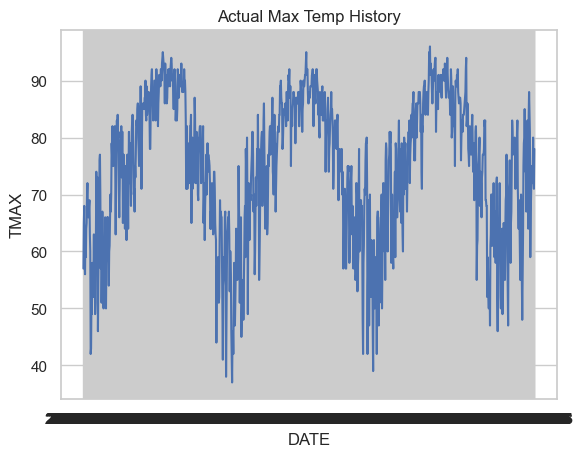

In [9]:
# Plots data we are testing
sns.set(style="whitegrid")
  

# plotting strip plot with seaborn
# deciding the attributes of dataset on
# which plot should be made
ax = sns.lineplot(x='DATE', y='TMAX', data=Weather_Data_Cull)
  
# giving title to the plot
plt.title('Actual Max Temp History')
  
# function to show plot
plt.show()

In [10]:
# This Section Creates creates a couple of useful arrays that are used for testing and visualization in the future
# Here we also Tranlate our Pnadas dataframe into a numpy array for the Random forest algorithm 

Weather_Data_Cull = Weather_Data_Cull.drop(['DATE'], axis=1)
# Labels are the values we want to predict
labels = np.array(Weather_Data_Cull['TMAX'])
# Remove the labels from the features
# axis 1 refers to the columns
Weather_Data_Test= Weather_Data_Cull.drop('TMAX', axis = 1)
# Saving feature names for later use
feature_list = list(Weather_Data_Test.columns)
# Convert to numpy array
Weather_Data_Test = np.array(Weather_Data_Test)

In [11]:
# Dividing the dataset so into training sets, these inputs are required to complete training
train_features, test_features, train_labels, test_labels = train_test_split(Weather_Data_Test, labels, test_size = 0.25,
                                                                           random_state = 42)

In [12]:
# TMIN is used as an absolute worst prediction the model could make
# The thought process is that the TMAX we are predicting will be relatively close or have some kind of relationship to TMIN
baseline_preds = test_features[:, feature_list.index('TMIN')]
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2), 'degrees.')

Average baseline error:  19.33 degrees.


In [13]:
#This is where the ML model is actually created and trained
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)
rf.fit(train_features, train_labels);

In [14]:
# Now we can go back and Varify the strength of our model
# We're hoping that this result is much better than the baseline we established earlier
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)

# Print out the mean error
print('Mean Error:', round(np.mean(errors), 2), 'degrees.')

Mean Error: 3.63 degrees.


In [15]:
# This is another statistic that verifies the strength iof our model
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 94.64 %.


In [16]:
#In this section, we are able to pick out the most impactful variables in the set
#Essentially thse variables are ordered and quanitfied by how the weight they have in predicting the TMAX

# List of tuples with variable and importance
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first then prints them 
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True) 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: TMIN                 Importance: 0.8
Variable: MONTH                Importance: 0.07
Variable: AWND                 Importance: 0.04
Variable: WDF2                 Importance: 0.03
Variable: DAY                  Importance: 0.03
Variable: WSF2                 Importance: 0.02
Variable: YEAR                 Importance: 0.01


In [17]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Extract the two most important features
important_indices = [feature_list.index('TMIN'), feature_list.index('MONTH')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

# Train the random forest
rf_most_important.fit(train_important, train_labels)

# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)

errors = abs(predictions - test_labels)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape

print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 4.18 degrees.
Accuracy: 93.83 %.


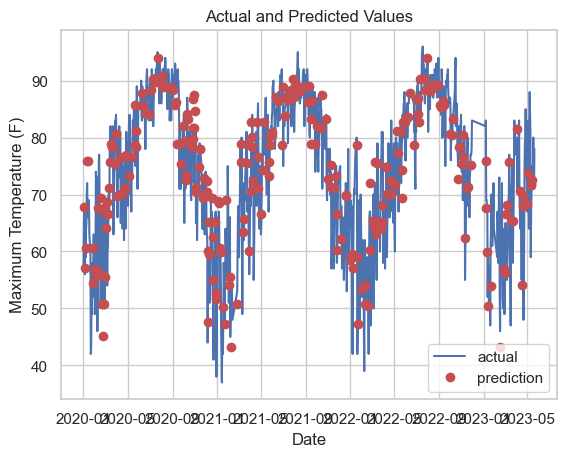

In [18]:
# Dates of training values
months = Weather_Data_Cull['MONTH']
days = Weather_Data_Cull['DAY']
years = Weather_Data_Cull['YEAR']

# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})

# Dates of predictions
months = test_features[:, feature_list.index('MONTH')]
days = test_features[:, feature_list.index('DAY')]
years = test_features[:, feature_list.index('YEAR')]

# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]

# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions}) 
# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')

# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
#plt.xticks(rotation = '60'); 
plt.legend()

# Graph labels
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values');